# Imports

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import sys
from pprint import pprint

# Initializing

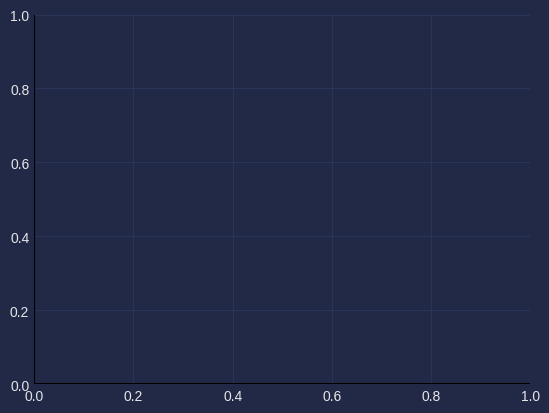

In [ ]:
style_url = r"https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle"
matplotlib.style.use(style_url)
plt.minorticks_on()
plt.grid(True)
plt.axhline(0, color='black')
plt.axvline(0, color='black')

#Calculating

In [ ]:
def gauss(a, b):
  n = len(a)
  for i in range(n):
    for j in range(i + 1, n):
      if a[i][i] == 0:
        for k in range(i + 1, n):
          if a[i][k] != 0:
            a[i], a[k] = a[k], a[i]
            b[i], b[k] = b[k], b[i]
            break
      ratio = a[j][i] / a[i][i]
      for k in range(n):
        a[j][k] -= a[i][k] * ratio
      b[j] -= b[i] * ratio

  n = len(b)
  x = [0] * n
  for i in range(n - 1, -1, -1):
      x[i] = b[i]
      for j in range(i + 1, n):
          x[i] -= a[i][j] * x[j]
      x[i] /= a[i][i]
  return x

# def gauss_rev(a, b):
#   n = len(a)
#   x = [0 for _ in range(len(b))]
#   for i in range(1, n + 1):
#     r = b[n - i]
#     for j in range(n + 1 - i, n):
#       r -= x[j] * a[n - i][j]
#     x[n - i] = round(r / a[n - i][n - i])
#   return x

# def gauss_rev(a, b):
#     n = len(b)
#     x = [0] * n
#     for i in range(n - 1, -1, -1):
#         x[i] = b[i]
#         for j in range(i + 1, n):
#             x[i] -= round(a[i][j] * x[j])
#         x[i] /= a[i][i]
#     return x

def tridiagonal(m, q):
  n = len(m)
  A = [0] * n
  B = [0] * n
  x = [0] * n

  # Инициализация начальных значений
  a = 0
  b = m[0][0]
  c = m[0][1]
  d = q[0]
  A[0] = -c / b
  B[0] = d / b

  for i in range(1, n):
    a = m[i][i - 1]
    b = m[i][i]
    if (i < n - 1):
      c = m[i][i + 1]
    else:
      c = 0
    d = q[i]
    A[i] = -c / (a * A[i - 1] + b)
    B[i] = (d - a * B[i - 1]) / (a * A[i - 1] + b)

  # Обратный проход
  B[n - 1] = (d - a * B[n - 2])/(b + a*A[n - 2])
  A[n - 1] = 0
  x[n - 1] = B[n - 1]
  for i in range(n - 2, -1, -1):
    x[i] = A[i] * x[i + 1] + B[i]

  return x

def mprint(a):
  for i in range(len(a)):
    for j in range(len(a[i])):
      print(f'{a[i][j]: >+10.3f}',  end=' ')
    print()

def fprint(a):
  for i in range(len(a)):
    print(f'{a[i]: >+10.3f}',  end=' ')
    # print(f'{a[i]: >10.0f}',  end=' ')
  print()

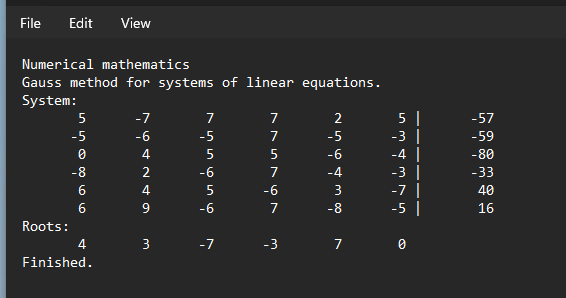

# Gauss

In [ ]:

matrix1 = [
    [5, -7, 7, 7, 2, 5],
    [-5, -6, -5, 7, -5, -3],
    [0, 4, 5, 5, -6, -4],
    [-8, 2, -6, 7, -4, -3],
    [6, 4, 5, -6, 3, -7],
    [6, 9, -6, 7, -8, -5],
]

coeff1 = [-57, -59, -80, -33, 40, 16]


res1 = gauss(matrix1, coeff1)

print('Треугольный вид:')
mprint(matrix1)
print('Свободные коэффициенты:')
fprint(coeff1)
print('Вычисленное решение:')
fprint(res1)


Треугольный вид:
    +5.000     -7.000     +7.000     +7.000     +2.000     +5.000 
    +0.000    -13.000     +2.000    +14.000     -3.000     +2.000 
    +0.000     +0.000     +5.615     +9.308     -6.923     -3.385 
    +0.000     +0.000     -0.000     +2.019     +5.989     +5.866 
    +0.000     +0.000     +0.000     +0.000     -8.335    -16.138 
    +0.000     +0.000     +0.000     +0.000     +0.000   +144.854 
Свободные коэффициенты:
       -57       -116       -116         36        -58          0 
Вычисленное решение:
         4          3         -7         -3          7          0 


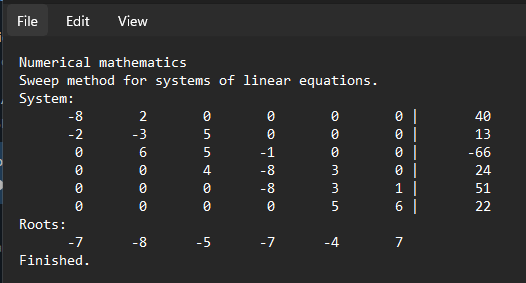


# Tridiagonal matrix algorithm

In [ ]:
matrix2 = [
    [-8, 2, 0, 0, 0, 0],
    [-2, -3, 5, 0, 0, 0],
    [0, 6, 5, -1, 0, 0],
    [0, 0, 4, -8, 3, 0],
    [0, 0, 0, -8, 3, 1],
    [0, 0, 0, 0, 5, 6],
]

coeff2 = [
    40,
    13,
    -66,
    24,
    51,
    22,
]


res2 = tridiagonal(matrix2,  coeff2)

print('Матрица:')
mprint(matrix2)
print('Свободные коэффициенты:')
fprint(coeff2)
print('Вычисленное решение:')
fprint(res2)

Матрица:
    -8.000     +2.000     +0.000     +0.000     +0.000     +0.000 
    -2.000     -3.000     +5.000     +0.000     +0.000     +0.000 
    +0.000     +6.000     +5.000     -1.000     +0.000     +0.000 
    +0.000     +0.000     +4.000     -8.000     +3.000     +0.000 
    +0.000     +0.000     +0.000     -8.000     +3.000     +1.000 
    +0.000     +0.000     +0.000     +0.000     +5.000     +6.000 
Свободные коэффициенты:
        40         13        -66         24         51         22 
Вычисленное решение:
        -7         -8         -5         -7         -4          7 


# Gauss for tridiagonal

In [ ]:
matrix2 = [
    [-8, 2, 0, 0, 0, 0],
    [-2, -3, 5, 0, 0, 0],
    [0, 6, 5, -1, 0, 0],
    [0, 0, 4, -8, 3, 0],
    [0, 0, 0, -8, 3, 1],
    [0, 0, 0, 0, 5, 6],
]

coeff2 = [
    40,
    13,
    -66,
    24,
    51,
    22,
]


res2 = gauss(matrix2,  coeff2)

print('Матрица:')
mprint(matrix2)
print('Свободные коэффициенты:')
fprint(coeff2)
print('Вычисленное решение:')
fprint(res2)

Матрица:
    -8.000     +2.000     +0.000     +0.000     +0.000     +0.000 
    +0.000     -3.500     +5.000     +0.000     +0.000     +0.000 
    +0.000     +0.000    +13.571     -1.000     +0.000     +0.000 
    +0.000     +0.000     +0.000     -7.705     +3.000     +0.000 
    +0.000     +0.000     +0.000     +0.000     -0.115     +1.000 
    +0.000     +0.000     +0.000     +0.000     +0.000    +49.571 
Свободные коэффициенты:
        40          3        -61         42          7        347 
Вычисленное решение:
        -7         -8         -5         -7         -4          7 


# Tridiagonal for gauss

In [ ]:
matrix1 = [
    [5, -7, 7, 7, 2, 5],
    [-5, -6, -5, 7, -5, -3],
    [0, 4, 5, 5, -6, -4],
    [-8, 2, -6, 7, -4, -3],
    [6, 4, 5, -6, 3, -7],
    [6, 9, -6, 7, -8, -5],
]

coeff1 = [-57, -59, -80, -33, 40, 16]


res1 = tridiagonal(matrix1, coeff1)

print('Треугольный вид:')
mprint(matrix1)
print('Свободные коэффициенты:')
fprint(coeff1)
print('Вычисленное решение:')
fprint(res1)

Треугольный вид:
    +5.000     -7.000     +7.000     +7.000     +2.000     +5.000 
    -5.000     -6.000     -5.000     +7.000     -5.000     -3.000 
    +0.000     +4.000     +5.000     +5.000     -6.000     -4.000 
    -8.000     +2.000     -6.000     +7.000     -4.000     -3.000 
    +6.000     +4.000     +5.000     -6.000     +3.000     -7.000 
    +6.000     +9.000     -6.000     +7.000     -8.000     -5.000 
Свободные коэффициенты:
       -57        -59        -80        -33         40         16 
Вычисленное решение:
         6         13        -10        -16         -6          6 


In [ ]:

matrix1 = [
    [5, 6, 8, 9],
    [7, 9, 1, 1],
    [3, 2, 11, 15],
    [16, 18, 3, 5],
]

coeff1 = [7, 2, 3, 9]


res1 = gauss(matrix1, coeff1)

print('Треугольный вид:')
mprint(matrix1)
print('Свободные коэффициенты:')
fprint(coeff1)
print('Вычисленное решение:')
fprint(res1)


Треугольный вид:
    +5.000     +6.000     +8.000     +9.000 
    +0.000     +0.600    -10.200    -11.600 
    +0.000     +0.000    -21.000    -21.333 
    +0.000     +0.000     +0.000     -3.317 
Свободные коэффициенты:
    +7.000     -7.800    -22.000    +16.048 
Вычисленное решение:
    +6.775     -5.172     +5.962     -4.837 
